In [143]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from patsy import dmatrices
import os 
working_directory = os.getcwd()
print(working_directory)

/Users/rushipankade/Desktop/Untitled Folder


In [11]:
path = working_directory + '/IBM Attrition Data.csv'
employee_df = pd.read_csv(path)
employee_df

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Research & Development,23,2,Medical,3,4,Married,2571,4,3,5
1466,39,No,Research & Development,6,1,Medical,4,1,Married,9991,4,3,7
1467,27,No,Research & Development,4,3,Life Sciences,2,2,Married,6142,1,3,6
1468,49,No,Sales,2,3,Medical,4,2,Married,5390,2,2,9


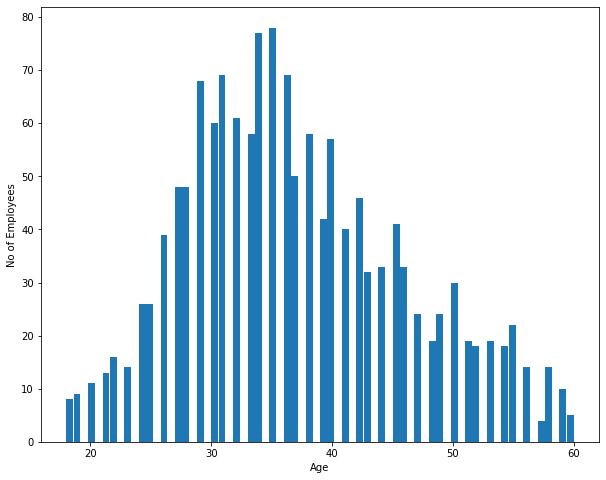

In [30]:
plt.figure(figsize=(10,8))
plt.hist(employee_df['Age'],bins= 70, rwidth=0.95)
plt.xlabel("Age")
plt.ylabel("No of Employees")
plt.show()

Text(0.5, 1.0, 'Attrition by age')

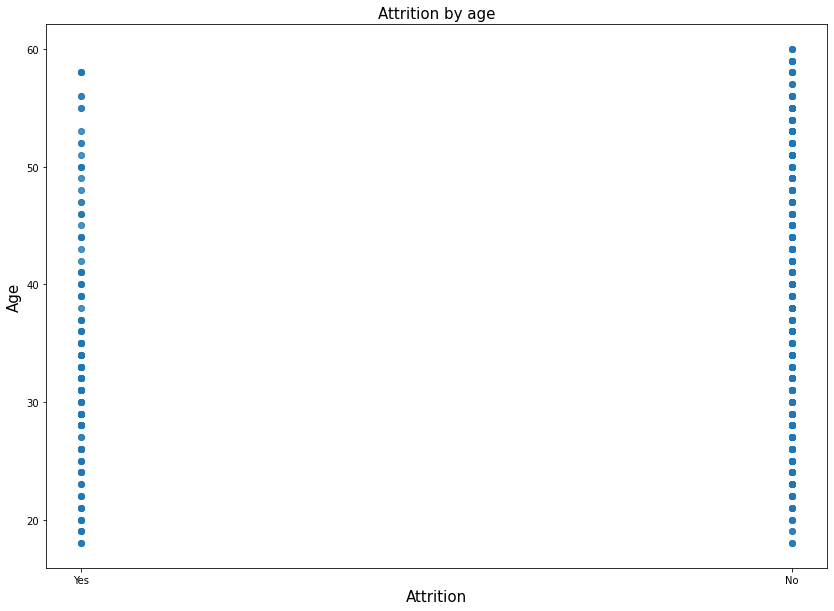

In [41]:
plt.figure(figsize=(14,10))
plt.scatter(employee_df.Attrition,employee_df.Age, alpha=0.55)
plt.xlabel("Attrition", fontsize = 15)
plt.ylabel("Age", fontsize = 15)
plt.title("Attrition by age", fontsize = 15)

Text(0.5, 1.0, 'Plot for left employees')

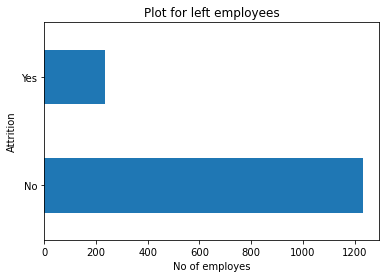

In [58]:
plt.figure(figsize=(6,4))
employee_df.Attrition.value_counts().plot(kind = 'barh')
plt.xlabel("No of employes")
plt.ylabel("Attrition")
plt.title("Plot for left employees")

In [60]:
employee_df.EducationField.unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

Text(0.5, 1.0, 'Distribution by Education Field')

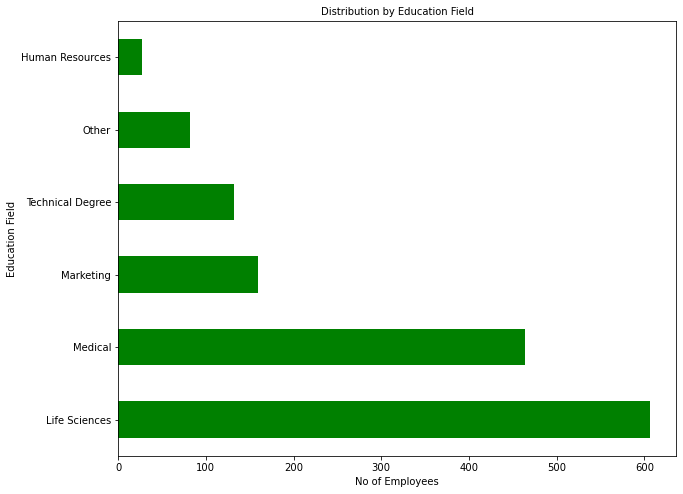

In [66]:
plt.figure(figsize=(10,8))
employee_df.EducationField.value_counts().plot(kind = 'barh', color = 'g')
plt.xlabel("No of Employees")
plt.ylabel("Education Field")
plt.title("Distribution by Education Field", fontsize = 10)

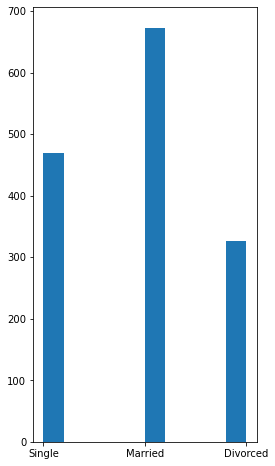

In [74]:
plt.figure(figsize=(4,8))
plt.hist(employee_df['MaritalStatus'])
plt.show()

In [77]:
employee_df['Attrition'].replace('Yes',1, inplace=True)
employee_df['Attrition'].replace('No',0, inplace=True)

In [78]:
employee_df.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,1,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,0,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,1,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,0,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,0,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2


In [81]:
X = employee_df.drop(['Attrition'],axis=1)
X.head()
Y = employee_df['Attrition']
Y.head()

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int64

In [117]:
employee_df['EducationField'].replace('Life Sciences',1, inplace = True)
employee_df['EducationField'].replace('Medical',2, inplace = True)
employee_df['EducationField'].replace('Marketing',3, inplace = True)
employee_df['EducationField'].replace('Technical Degree',4, inplace = True)
employee_df['EducationField'].replace('Human Resources',5, inplace = True)
employee_df['EducationField'].replace('Other',6, inplace = True)

In [118]:
employee_df['EducationField'].value_counts()

1    606
2    464
3    159
4    132
6     82
5     27
Name: EducationField, dtype: int64

In [107]:
employee_df['Department'].replace('Research & Development',1, inplace=True)
employee_df['Department'].replace('Sales',2, inplace=True)
employee_df['Department'].replace('Human Resources', 3, inplace=True)

In [108]:
employee_df['MaritalStatus'].replace('Married',1, inplace=True)
employee_df['MaritalStatus'].replace('Single',2, inplace=True)
employee_df['MaritalStatus'].replace('Divorced',3, inplace=True)

In [125]:
x=employee_df.select_dtypes(include=['int64'])

In [126]:
x.dtypes

Age                        int64
Attrition                  int64
Department                 int64
DistanceFromHome           int64
Education                  int64
EducationField             int64
EnvironmentSatisfaction    int64
JobSatisfaction            int64
MaritalStatus              int64
MonthlyIncome              int64
NumCompaniesWorked         int64
WorkLifeBalance            int64
YearsAtCompany             int64
dtype: object

In [96]:
y = employee_df['Attrition']
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int64

In [130]:
y, x = dmatrices('Attrition ~ Age + Department + \
                  DistanceFromHome + Education + EducationField + YearsAtCompany',
                  employee_df, return_type="dataframe")
print (x.columns)

Index(['Intercept', 'Age', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'YearsAtCompany'],
      dtype='object')


In [137]:
y,x

(      Attrition
 0           1.0
 1           0.0
 2           1.0
 3           0.0
 4           0.0
 ...         ...
 1465        0.0
 1466        0.0
 1467        0.0
 1468        0.0
 1469        0.0
 
 [1470 rows x 1 columns],
       Intercept   Age  Department  DistanceFromHome  Education  \
 0           1.0  41.0         2.0               1.0        2.0   
 1           1.0  49.0         1.0               8.0        1.0   
 2           1.0  37.0         1.0               2.0        2.0   
 3           1.0  33.0         1.0               3.0        4.0   
 4           1.0  27.0         1.0               2.0        1.0   
 ...         ...   ...         ...               ...        ...   
 1465        1.0  36.0         1.0              23.0        2.0   
 1466        1.0  39.0         1.0               6.0        1.0   
 1467        1.0  27.0         1.0               4.0        3.0   
 1468        1.0  49.0         2.0               2.0        3.0   
 1469        1.0  34.0         

In [138]:
y=np.ravel(y)

In [150]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model = model.fit(x,y)
model.score(x,y)

0.8408163265306122

In [151]:
y.mean()

0.16122448979591836

In [152]:
X_train,X_test,y_train, y_test= sklearn.model_selection.train_test_split(x,y,test_size=0.3,random_state=0)
model2= LogisticRegression()
model2.fit(X_train,y_train)

LogisticRegression()

In [158]:
predicted=model2.predict(X_test)
print (predicted)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [160]:
probs=model2.predict_proba(X_test)
print(probs)

[[0.85827561 0.14172439]
 [0.80181603 0.19818397]
 [0.74318441 0.25681559]
 [0.86595529 0.13404471]
 [0.72669599 0.27330401]
 [0.79148746 0.20851254]
 [0.85282981 0.14717019]
 [0.8578191  0.1421809 ]
 [0.96443839 0.03556161]
 [0.93460378 0.06539622]
 [0.95098769 0.04901231]
 [0.83137802 0.16862198]
 [0.85731241 0.14268759]
 [0.86098945 0.13901055]
 [0.88765517 0.11234483]
 [0.88579557 0.11420443]
 [0.88071612 0.11928388]
 [0.77730232 0.22269768]
 [0.83499274 0.16500726]
 [0.86946146 0.13053854]
 [0.69814211 0.30185789]
 [0.94698321 0.05301679]
 [0.86853803 0.13146197]
 [0.83191835 0.16808165]
 [0.60493589 0.39506411]
 [0.84007274 0.15992726]
 [0.91555038 0.08444962]
 [0.92777094 0.07222906]
 [0.67257048 0.32742952]
 [0.86900779 0.13099221]
 [0.89798667 0.10201333]
 [0.80227319 0.19772681]
 [0.86300406 0.13699594]
 [0.95775405 0.04224595]
 [0.82449307 0.17550693]
 [0.86853119 0.13146881]
 [0.90444219 0.09555781]
 [0.65613009 0.34386991]
 [0.90331275 0.09668725]
 [0.8014122  0.1985878 ]


In [161]:
from sklearn import metrics

print (metrics.accuracy_score(y_test, predicted))
print (metrics.roc_auc_score(y_test, probs[:, 1]))

0.8412698412698413
0.6539468617635734


In [162]:
print (metrics.confusion_matrix(y_test, predicted))
print (metrics.classification_report(y_test, predicted))

[[371   0]
 [ 70   0]]
              precision    recall  f1-score   support

         0.0       0.84      1.00      0.91       371
         1.0       0.00      0.00      0.00        70

    accuracy                           0.84       441
   macro avg       0.42      0.50      0.46       441
weighted avg       0.71      0.84      0.77       441



/Users/rushipankade/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rushipankade/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rushipankade/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

In [163]:
print (X_train)

      Intercept   Age  Department  DistanceFromHome  Education  \
338         1.0  30.0         2.0               5.0        3.0   
363         1.0  33.0         2.0               5.0        3.0   
759         1.0  45.0         3.0              24.0        4.0   
793         1.0  28.0         1.0              15.0        2.0   
581         1.0  30.0         1.0               1.0        3.0   
...         ...   ...         ...               ...        ...   
763         1.0  34.0         2.0              10.0        4.0   
835         1.0  35.0         3.0               8.0        4.0   
1216        1.0  43.0         2.0               2.0        3.0   
559         1.0  38.0         1.0               2.0        5.0   
684         1.0  40.0         2.0              10.0        4.0   

      EducationField  YearsAtCompany  
338              3.0            10.0  
363              3.0             1.0  
759              2.0             6.0  
793              1.0             4.0  
581         

In [164]:
kk=[[1.0, 23.0, 1.0, 500.0, 3.0, 24.0, 1.0]]
print(model.predict_proba(kk))

[[1.84952893e-06 9.99998150e-01]]
